In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.io import loadmat
import utils
grader=utils.Grader()

In [2]:
data=loadmat(os.path.join("ex5","ex5data1.mat"))

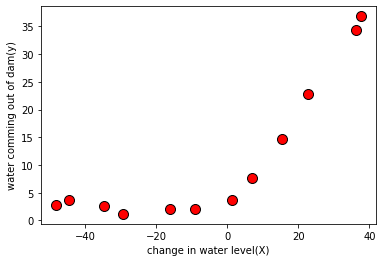

In [3]:
X,y=data["X"],data["y"][:,0]
Xtest,ytest=data["Xtest"],data["ytest"][:,0]
Xval,yval=data["Xval"],data["yval"][:,0]
m=y.size
plt.plot(X,y,"ro",ms=10,mec="k",mew=1)
plt.xlabel("change in water level(X)")
plt.ylabel("water comming out of dam(y)")
plt.show()

In [4]:
def lenRegCostFunction(X,y,theta,lambda_=0.0):
    m=y.size
    J=0
    grad=np.zeros(theta.shape)
    J=(1/(2*m))*np.sum(np.square(np.dot(X,theta)-y))+(lambda_/(2*m))*(np.sum(np.square(theta[1:])))
    grad=(1/m)*np.dot((np.dot(X,theta)-y),X)
    grad[1:]=grad[1:]+(lambda_/m)*(theta[1:])
    return J,grad

In [5]:
theta=np.array([1,1])
J,_=lenRegCostFunction(np.concatenate([np.ones((m, 1)), X],axis=1),y,theta,1)

In [6]:
J

303.9931922202643

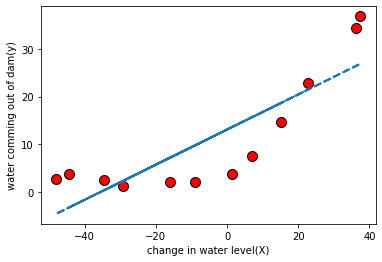

In [7]:
X_aug=np.concatenate([np.ones((m, 1)), X],axis=1)
theta=utils.trainLinearReg(lenRegCostFunction,X_aug,y,lambda_=0)
plt.plot(X,y,"ro",ms=10,mec="k",mew=1)
plt.xlabel("change in water level(X)")
plt.ylabel("water comming out of dam(y)")
plt.plot(X,np.dot(X_aug,theta),"--",lw=2)
plt.show()

In [8]:
def learningCurve(X,y,Xval,yval,lambda_=0):
    m=y.size
    error_train=np.zeros(m)
    error_val=np.zeros(m)
    for i in range(1,m+1):
        theta_t=utils.trainLinearReg(lenRegCostFunction,X[:i],y[:i],lambda_=lambda_)
        error_train[i-1],_=lenRegCostFunction(X[:i],y[:i],theta_t,lambda_=0)
        error_val[i-1],_=lenRegCostFunction(Xval,yval,theta_t,lambda_=0)
    return error_train,error_val

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.302641
  	3		3.286595	45.010231
  	4		2.842678	48.368910
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


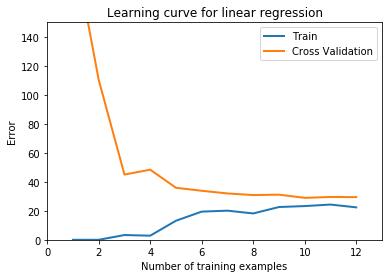

In [9]:
X_aug = np.concatenate([np.ones((m, 1)), X], axis=1)
Xval_aug = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)
error_train, error_val = learningCurve(X_aug, y, Xval_aug, yval, lambda_=0)

plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In [10]:
def polyFeatures(X,p):
    X_poly=np.zeros((X.shape[0],p))
    for i in range(p):
        X_poly[:,i]=X[:,0]**(i+1)
    return X_poly

In [11]:
p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = utils.featureNormalize(X_poly)
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test -= mu
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((ytest.size, 1)), X_poly_test], axis=1)

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val -= mu
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((yval.size, 1)), X_poly_val], axis=1)

print('Normalized Training Example 1:')
X_poly[0,:]

Normalized Training Example 1:


array([ 1.        , -0.36214078, -0.75508669,  0.18222588, -0.70618991,
        0.30661792, -0.59087767,  0.3445158 , -0.50848117])

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121511
  	3		0.000000	59.071640
  	4		0.000000	77.997856
  	5		0.000000	6.449508
  	6		0.000000	10.825774
  	7		0.000000	27.922419
  	8		0.025083	9.256265
  	9		0.000182	31.381205
  	10		0.033367	22.879956
  	11		0.035666	26.797570
  	12		0.029686	43.849641


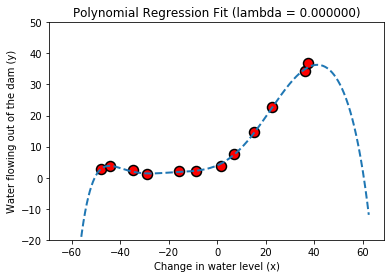

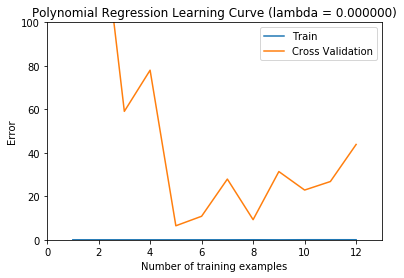

In [12]:
lambda_ = 0
theta = utils.trainLinearReg(lenRegCostFunction, X_poly, y,
                             lambda_=lambda_, maxiter=55)

# Plot training data and fit
plt.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')

utils.plotFit(polyFeatures, np.min(X), np.max(X), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = %f)' % lambda_)
plt.ylim([-20, 50])

plt.figure()
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lambda_)
plt.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = %f)' % lambda_)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lambda_)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In [13]:
def validationCurve(X,y,Xval,yval):
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))
    for i in range(1,len(lambda_vec)+1):
        lambda_try=lambda_vec[i-1]
        theta_t=utils.trainLinearReg(lenRegCostFunction,X,y,lambda_=lambda_try)
        error_train[i-1],_=lenRegCostFunction(X,y,theta_t,lambda_=0)
        error_val[i-1],_=lenRegCostFunction(Xval,yval,theta_t,lambda_=0)
    return lambda_vec,error_train,error_val

lambda		Train Error	Validation Error
 0.000000	0.029686	43.849641
 0.001000	0.112684	9.872207
 0.003000	0.170937	16.304746
 0.010000	0.221505	16.943800
 0.030000	0.281840	12.829510
 0.100000	0.459324	7.586857
 0.300000	0.921763	4.636826
 1.000000	2.076201	4.260600
 3.000000	4.901371	3.822930
 10.000000	16.092273	9.945554


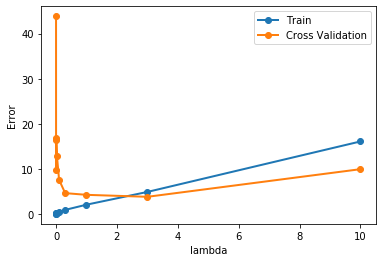

In [14]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

plt.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))

In [15]:
grader[1]=lenRegCostFunction
grader[2]=lenRegCostFunction
grader[3]=learningCurve
grader[4]=polyFeatures
grader[5]=validationCurve
grader.grade()


Submitting Solutions | Programming Exercise regularized-linear-regression-and-bias-variance

Use token from last successful submission (13vijay12@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
Regularized Linear Regression Cost Function |  25 /  25 | Nice work!
     Regularized Linear Regression Gradient |  25 /  25 | Nice work!
                             Learning Curve |  20 /  20 | Nice work!
                 Polynomial Feature Mapping |  10 /  10 | Nice work!
                           Validation Curve |  20 /  20 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  

